<a href="https://colab.research.google.com/github/Ashmikaverma/machine-learning/blob/main/Gold_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
from sklearn import metrics


In [ ]:
gold_data=pd.read_csv('/content/train.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [ ]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [ ]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'], errors='coerce')

In [ ]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     2290 non-null   datetime64[ns]
 1   SPX      2290 non-null   float64       
 2   GLD      2290 non-null   float64       
 3   USO      2290 non-null   float64       
 4   SLV      2290 non-null   float64       
 5   EUR/USD  2290 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 107.5 KB


In [ ]:
correlation=gold_data.corr()

<Axes: >

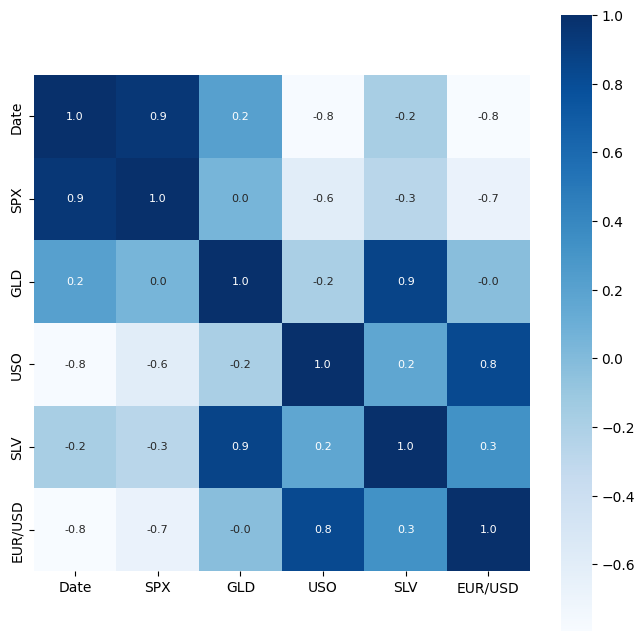

In [ ]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

In [ ]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<ipython-input-45-4569879e3289>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

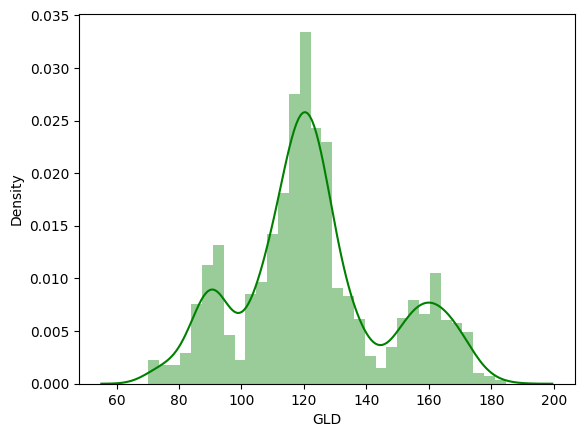

In [ ]:
sns.distplot(gold_data['GLD'],color='green')

In [ ]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']

In [ ]:
print(X.shape,Y.shape)

(2290, 4) (2290,)


In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [81]:
regressor=RandomForestRegressor(n_estimators=200)

In [82]:
regressor.fit(X_train,Y_train)

RandomForestRegressor(n_estimators=200)

In [83]:
test_data_prediction=regressor.predict(X_test)

In [84]:
print(test_data_prediction)

[168.55704924  82.13624977 116.09305013 127.68695064 120.794251
 154.69979798 150.25509829 126.12150033 117.52624875 125.94890056
 116.65640085 172.1266011  141.78509847 167.90929845 115.26825
 117.7366504  138.97250305 170.07965078 159.50320308 157.88579949
 155.21310028 125.15545026 175.63439981 156.80885317 125.23905031
  93.87254977  77.67450002 120.73609998 119.0916994  167.40974938
  88.17600043 125.11960009  91.18630084 117.63565031 121.13139952
 136.39645123 115.45575141 115.40975044 147.65229989 107.35470086
 104.26355254  87.29404802 126.43465073 117.87500002 152.98174905
 119.60895004 108.3750001  108.09019803  93.16640057 127.08094794
  75.01845035 113.58864894 121.43845018 111.18184905 118.91729895
 120.52634958 158.88685001 168.02040148 146.69999654  85.86544859
  94.34175036  86.8690488   90.64025023 118.93985087 126.44285048
 127.60070022 169.22839972 122.24634917 117.43199891  98.45370041
 168.37205128 142.9973481  131.86350244 121.27225224 121.21394948
 119.76660043 1

In [77]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("R squared error : ",error_score)


R squared error :  0.9892950607865637


In [85]:
y_test=np.array(Y_test)
print(y_test.shape)

(458,)


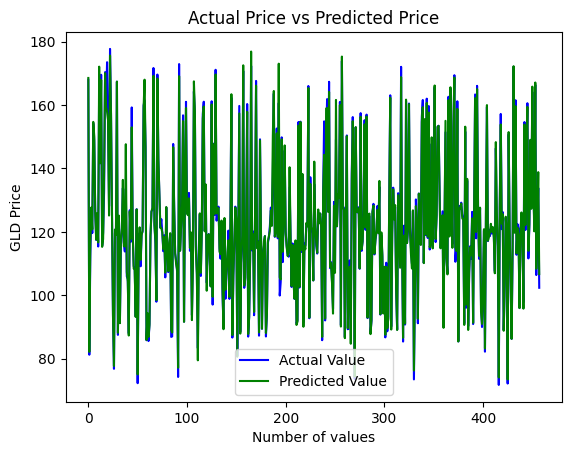

In [86]:
plt.plot(Y_test,color='blue',label='Actual Value')
plt.plot(test_data_prediction,color='green',label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()

In [62]:
i want

In [87]:
# prompt: i want to test the model by givingit some sample values and makingit predict the price

sample_values =[[1333.25,71.029999,15.717,1.464]]
predicted_price = regressor.predict(sample_values)
print("Predicted gold price for the given sample values:",predicted_price[0] )


Predicted gold price for the given sample values: 86.77709935499996


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [ ]:
# prompt: what is n_estimators in random forest classifier

# The number of trees in the forest.
# This is the most important parameter in Random Forest and it controls the accuracy of the model.
# The higher the number of trees, the more accurate the model will be.
# However, it also increases the training time.
# A good starting point is to use 100 trees.
n_estimators = 100
